In [1]:
from web3 import Web3
import pandas as pd
pd.set_option('display.max_rows', 100)
from tqdm import tqdm
import ast #eval() to interpret code
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
tqdm.pandas()
import time
import warnings
warnings.filterwarnings('ignore')
from pandas import Timestamp
import calendar

In [2]:
decode = pd.read_csv('Decode_Jul_2023.csv')
decode.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
print(decode.shape)

(4466880, 5)


In [5]:
decode

,timestamp,order_trx,transaction_hash,fn_name,args
0,2019-11-13 19:16:32 UTC,0,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,rely,{'usr': '0xbaa65281c2FA2baAcb2cb550BA051525A48...
1,2019-11-13 19:16:32 UTC,1,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,deny,{'usr': '0x403689148fA98a5a6fDcC0b984914Ae968d...
2,2019-11-13 19:16:32 UTC,2,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,rely,{'usr': '0x65C79fcB50Ca1594B025960e539eD7A9a6D...
3,2019-11-13 19:18:41 UTC,3,0xaac1fe54d617a879bb05bec28b1dd4159f3ad1ba1e67...,rely,{'usr': '0x19c0976f590D67707E62397C87829d896Dc...
4,2019-11-13 19:18:41 UTC,4,0xaac1fe54d617a879bb05bec28b1dd4159f3ad1ba1e67...,rely,{'usr': '0x197E90f9FAD81970bA7976f33CbD77088E5...
...,...,...,...,...,...
4466875,2023-07-31 23:49:35 UTC,4466875,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,frob,{'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...
4466876,2023-07-31 23:49:35 UTC,4466876,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,move,{'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...
4466877,2023-07-31 23:49:35 UTC,4466877,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,move,{'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...
4466878,2023-07-31 23:55:59 UTC,4466878,0xe799722397920e4c9a7d5267bec2650ea8846220880d...,file,{'ilk': b'UNIV2DAIUSDC-A\x00\x00\x00\x00\x00\x...


In [4]:
def clean_args(df):
  '''
    Clear a table of special characters
    return:
          column 'args' in table with dictionary without special characters
  '''
  df['args'] = df['args'].apply(lambda x: x.replace("b'", "'"))
  df['args'] = df['args'].apply(lambda x: x.replace("\\x00", ""))
  df['args'] = df['args'].apply(lambda x: x.replace("\'", "\""))
  return df

In [5]:
df = clean_args(decode)
df

,timestamp,order_trx,transaction_hash,fn_name,args
0,2019-11-13 19:16:32 UTC,0,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,rely,"{""usr"": ""0xbaa65281c2FA2baAcb2cb550BA051525A48..."
1,2019-11-13 19:16:32 UTC,1,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,deny,"{""usr"": ""0x403689148fA98a5a6fDcC0b984914Ae968d..."
2,2019-11-13 19:16:32 UTC,2,0xa39edcdeb7310150d7be44b8da94e5043d1cf8600d59...,rely,"{""usr"": ""0x65C79fcB50Ca1594B025960e539eD7A9a6D..."
3,2019-11-13 19:18:41 UTC,3,0xaac1fe54d617a879bb05bec28b1dd4159f3ad1ba1e67...,rely,"{""usr"": ""0x19c0976f590D67707E62397C87829d896Dc..."
4,2019-11-13 19:18:41 UTC,4,0xaac1fe54d617a879bb05bec28b1dd4159f3ad1ba1e67...,rely,"{""usr"": ""0x197E90f9FAD81970bA7976f33CbD77088E5..."
...,...,...,...,...,...
4466875,2023-07-31 23:49:35 UTC,4466875,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,frob,"{""i"": ""PSM-USDC-A"", ""u"": ""0x89B78CfA322F6C5dE0..."
4466876,2023-07-31 23:49:35 UTC,4466876,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,move,"{""src"": ""0x89B78CfA322F6C5dE0aBcEecab66Aee4539..."
4466877,2023-07-31 23:49:35 UTC,4466877,0x26c9d1e2d7f72436488525cb124c9d1ba9a4e3e9a81a...,move,"{""src"": ""0x89B78CfA322F6C5dE0aBcEecab66Aee4539..."
4466878,2023-07-31 23:55:59 UTC,4466878,0xe799722397920e4c9a7d5267bec2650ea8846220880d...,file,"{""ilk"": ""UNIV2DAIUSDC-A"", ""what"": ""spot"", ""dat..."


In [7]:
def calculate_rate_time(df, fold_rate = 10**27):
    '''
        Parse a table rows to obtain new columns containing assets names, timestamps and rates
        
    '''
    ilk = []
    time = []
    rate = []
    df_new = df[df['fn_name'] == 'fold']
    df_new = df_new.reset_index()
    for index, row in tqdm(df_new.iterrows()):
        ilk.append(ast.literal_eval(row['args']).get('i', None))
        rate.append((ast.literal_eval(row['args']).get('rate', None)) / fold_rate)
        time.append(row['timestamp'])

    d = {'ilk': ilk, 'time': time, 'rate': rate}
    return pd.DataFrame(data=d)

In [8]:
data = calculate_rate_time(df)

283612it [00:56, 5055.69it/s]


In [52]:
data_eth_a = data[data['ilk'] == 'ETH-A']
df1 = data_eth_a.drop(['ilk'], axis=1)

df1['time'] = pd.to_datetime(df1.time, format='%Y-%m-%d %H:%M:%S %Z')
per = df1.time.dt.to_period("M")
g = df1.groupby(per)
grouped_eth_a = g.mean()

In [81]:
month_year = []
rate_eth_a = []
for index, row in tqdm(grouped_eth_a.iterrows()):
    date = calendar.month_name[int(str(row).split('-')[1])] + ' ' + str(row).split('-')[0].split('    ')[1]
    #rate = int(str(ro))
    month_year.append(date)
    rate_eth_a.append(row.rate)

45it [00:00, 556.54it/s]


In [ ]:
programs = list(data['ilk'].unique())
ilk_time = dict()
ilk_rate = dict()

for prog in programs:
    df_new = data[data['ilk'] == prog]
    df_new = df_new.reset_index()
    for index, row in tqdm(df_new.iterrows()):
        key = row['ilk']
        rate = row['rate']
        time = row['time']
        if key not in ilk_rate:
            ilk_rate[key] = [rate]
            ilk_time[key] = [time]
        else:
             ilk_rate[key].append(rate)
             ilk_time[key].append(time)

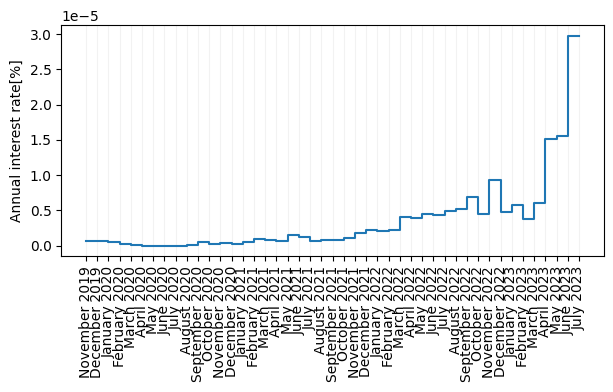

In [84]:
X = month_year
Y = rate_eth_a
plt.figure(figsize=(7,3))
plt.step(X, Y, drawstyle='steps')# label = 'fee') #, where='post', label='post')
# plt.plot(X, Y, 'o--', color='grey', alpha=0.3)

plt.xticks(rotation = 90)
plt.grid(axis='x', color='0.95')
plt.ylabel('Annual interest rate[%]')
# plt.legend()
plt.savefig('annual_rate.pdf', bbox_inches='tight')
# fig.savefig('test_fig06.pdf', bbox_inches='tight')
plt.show()

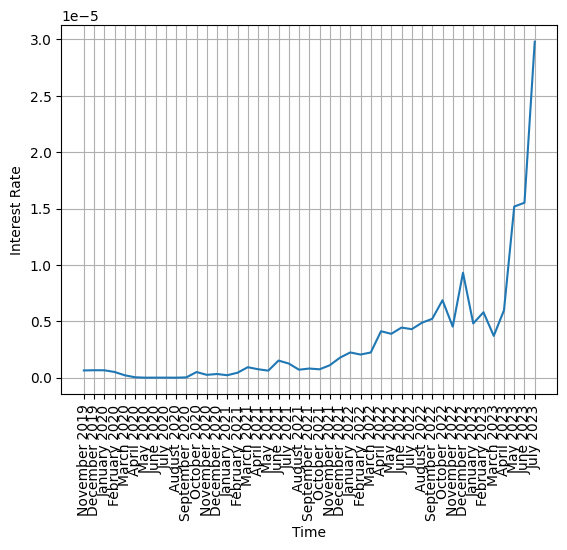

In [83]:
plt.plot(month_year, rate_eth_a)

plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)

plt.grid()
plt.show()

In [14]:
fold_rate = 10**27

def calculate_rate(df):
    '''
        Parse table rows to get rate for each asset
    '''
    ilk_rate = dict()
    
    for row in list(df[df['fn_name'] == 'fold'].args):
        global fold_rate
        key = row.split('\"')[3]
        value = int(row.split('\"')[10].split(': ')[1].split('}')[0])
        fold_rate += value
        if key in ilk_rate:
            value_prev = ilk_rate[key]
            ilk_rate[key] = ((value_prev + fold_rate) / 2) / 10**27
        else:
            ilk_rate[key] = fold_rate / 10**27
    return ilk_rate

ilk_rate = calculate_rate(df)
ilk_rate_sorted = sorted(ilk_rate.items(), key=lambda x:x[1], reverse=True)
ilk_rate_df = pd.DataFrame(list(dict(ilk_rate_sorted).items()), columns=['ilk', 'rate'])
ilk_rate_df.to_csv('log_interest.csv')

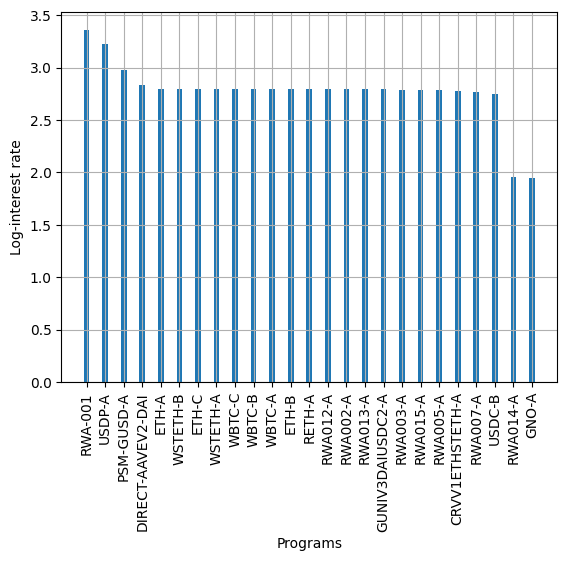

In [18]:
plt.bar(dict(ilk_rate_sorted[:25]).keys(), dict(ilk_rate_sorted[:25]).values(), width = 0.3)
plt.xticks(rotation=90)
plt.xlabel('Programs')
plt.ylabel('Log-interest rate')
plt.grid()
plt.show()

In [5]:
# Filter functions

df = df.loc[
    (df['fn_name'] == 'grab')
    |
    (df['fn_name'] == 'frob')
    |
    (df['fn_name'] == 'fold')
    |
    (df['fn_name'] == 'flux')
    |
    (df['fn_name'] == 'move') 
    |
    (df['fn_name'] == 'fork')
]
df.reset_index(drop = True, inplace=True)

In [6]:
# VAT class modifies from Grigorii Melnikov(Modified code)

class Vat(object):
    index = ['fn_name', 'ilk', 'usr', 'src', 'state']

    def __init__(self):
        pass

    def get_data(self, fn_name, ilk, usr, src=None):
        data = [ fn_name, ilk, usr, src, None]
        return data

    def parse_init(self, fn_args): #filter out didn't use it
        ilk = fn_args['ilk']
        data = [ 'init', ilk, None, None, None ]
        return pd.Series(data=data, index=Vat.index)

    def parse_frob(self, fn_args):
        ilk = fn_args['i']
        u = fn_args['u'] #it'll be vault(usr)
        v = fn_args['v']
        data = self.get_data('frob', ilk, u, v)
        return pd.Series(data=data, index=Vat.index)

    def parse_grab(self, fn_args):
        ilk = fn_args['i']
        u = fn_args['u'] #usr
        data = self.get_data('grab', ilk, u)
        return pd.Series(data=data, index=Vat.index)

    def parse_slip(self, fn_args):
        ilk = fn_args['ilk'] #didn't use it
        usr = fn_args['usr'] #it's not vault
        wad = fn_args['wad']
        data = self.get_data('slip', ilk, usr)
        return pd.Series(data=data, index=Vat.index)

    def parse_fold(self, fn_args):
        ilk = fn_args['i']
        rate = fn_args['rate']
        data = [ 'fold', ilk, None, None, { "rate": rate } ]
        return pd.Series(data=data, index=Vat.index)

    def parse_file(self, fn_args):
        # print (len(fn_args))
        ilk = fn_args.get('ilk', None)
        ilk = ilk if ilk else None 
        data = fn_args['data']
        what = fn_args['what'].decode('utf-8')[:4]
        data = [ 'file', ilk, None, None, {"data": data,"what": what} ]
        return pd.Series(data=data, index=Vat.index)

    def parse_fork_I(self, fn_args): #transfer out -dart, -dink
        ilk = fn_args['ilk']
        src = fn_args['src']
        dst = fn_args['dst']
        data = self.get_data('fork', ilk, src, dst)
        return pd.Series(data=data, index=Vat.index)

    def parse_fork_II(self, fn_args): #transfer in +dart, +dink
        ilk = fn_args['ilk']
        src = fn_args['src']
        dst = fn_args['dst']
        data = self.get_data('fork', ilk, dst, src )
        return pd.Series(data=data, index=Vat.index)

    def parse_flux(self, fn_args):
        ilk = fn_args['ilk']
        dst = fn_args['dst'] #some trx dst is not vault!!
        src = fn_args['src']
        data = self.get_data('flux', ilk, dst, src)
        return pd.Series(data=data, index=Vat.index)

    def parse_move(self, fn_args):
        ilk = None
        address = ['0x9759A6Ac90977b93B58547b4A71c78317f391A28',
                   '0x4729064efA9Fcf832C89191053Ec62c3eF7E19e0',
                   '0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869',
                   '0xA4C11215a7c1FF6897A7eF8141F816B67ef73372',
                   '0x402F9314D9337A34112FE3484BD87E06095036a3',
                   '0x78F2c2AF65126834c51822F56Be0d7469D7A523E']

        src = fn_args['src']
        dst = fn_args['dst']
        if src not in address:
          usr = src #vault
        else:
          usr = dst
        data = self.get_data('move', ilk, usr, dst)
        return pd.Series(data=data, index=Vat.index)

In [7]:
# Get vaults function from Grigorii Melnikov(modified code)

def get_vault(df, vat):
  '''
      Define usrs' id for each row of transaction

      Parameters:
        df - table of decoding raw data from Big Query
        vat - class using for parse data

      Return: Table with usrs' id 
  '''
  data = []
  for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    fn_name    = row['fn_name']
    time_stamp = row['timestamp']
    txn_hash   = row['transaction_hash']
    obj        = row['args']
    res        = json.loads(obj)

    series = None
    dart = res.get('dart', None)
    dink = res.get('dink', None)
    rad = res.get('rad', None)

    tab = pd.Series([time_stamp, txn_hash], index=['timestamp', 'transaction_hash'])
    ddr = pd.Series([dart, dink, rad], index=['dart', 'dink', 'rad'])

    if fn_name == 'grab':
      series = vat.parse_grab(res)

    elif fn_name == 'frob':
      series = vat.parse_frob(res)

    elif fn_name == 'fold':
      series = vat.parse_fold(res)

    elif fn_name == 'flux':
      series = vat.parse_flux(res)

    elif fn_name == 'move':
      series = vat.parse_move(res)

    elif fn_name == 'fork':
      ddr = pd.Series([-dart, -dink, None], index=['dart', 'dink', 'rad'])
      series = vat.parse_fork_I(res) ##transfer out -dart, -dink
      series = series._append(ddr)
      table = tab._append(series)
      data.append(table)

      tab = pd.Series([time_stamp, txn_hash], index=['timestamp', 'transaction_hash'])
      ddr = pd.Series([dart, dink, None], index=['dart', 'dink', 'rad'])
      series = vat.parse_fork_II(res) #transfer in +dart, +dink
    
    series = series._append(ddr)
    table = tab._append(series)
    data.append(table)

  cols = ['timestamp', 'transaction_hash', 'fn_name', 'ilk', 'usr', 'src', 'state', 'dart', 'dink', 'rad']
  table = pd.DataFrame(data=data, columns=cols)
  return table

In [10]:
vat = Vat()
vau = get_vault(df, vat)

100%|██████████| 2635567/2635567 [31:10<00:00, 1408.79it/s] 


In [11]:
vau.to_csv('tab_vaults.csv')

In [3]:
vau = pd.read_csv('tab_vaults.csv')

Get Rad values from 'move' function and remove 'move' function

In [7]:
def get_rad_(df):
    '''
        To prepare data before running 'get_operations' function
        From the structure of data 'generate dai' in case A and 'payback dai' in case B

        Pre-requitesite:
        Case A: data in row of 'frob' function with 'dart' > 0 there'll be 'move' after transaction
        Case B: data in row of 'frob' function with 'dart' < 0 there'll be 'move' before transaction

        Return:
        Table which 'frob' function contains 'rad' value and remove transaction in 'move' function
    '''

    def process_user_group(tab):
        tab['rad'] = np.where((tab['fn_name'] == 'frob') & (tab['dart'] > 0), tab['rad'].shift(-1),
                              np.where((tab['fn_name'] == 'frob') & (tab['dart'] < 0), tab['rad'].shift(1),
                                       tab['rad']))

        fn_name_mask = tab['fn_name'] != 'move'
        return tab[fn_name_mask]

    cols = ['timestamp', 'transaction_hash', 'fn_name', 'ilk', 'usr', 'src', 'state', 'dart', 'dink', 'rad']

    data = []
    table = pd.DataFrame(data=data, columns=cols)
    grouped = df.groupby('usr')

    for usr, user_group in tqdm(grouped):
        
        user_group_processed = process_user_group(user_group.copy())
        table = table._append(user_group_processed, ignore_index=True)

    return table

In [8]:
rad = get_rad_(vau)

100%|██████████| 62229/62229 [1:00:51<00:00, 17.04it/s]


In [ ]:
rad.to_csv('rad_vaults.csv')

In [10]:
rad = pd.read_csv('rad_vaults.csv')

### Define operations

In [11]:
def get_operations(df):
  '''
      Define user-actions for each row of transactions
      
      Pre-requisite:
        table with function frob/fork/grab
        frob - is about generate dai/payback dai or lock assets/unlock assets
        fork - is about transfer assets and debt between vaults
        grab - is about liquidation process

      Notes:
        dink - collateral assets
        dart - dai debt in usd exchange
        rad  - dai issued from platform

      Return:
        Table with actions  - lock assets
                            - unlock assets
                            - generate dai
                            - payback dai
                            - transfer in
                            - transfer out
                            - liquidate 
  '''
  cols = ['usr', 'ilk', 'transaction_hash', 'timestamp', 'user_action', 'lock_collateral', 'dai', 'dai(in exchange)']
  data = []
  table = pd.DataFrame(data=data, columns=cols)
  df['dart'] = df['dart'].apply(lambda x: float(x)/1e18)
  df['dink'] = df['dink'].apply(lambda x: float(x)/1e18)
  df['rad'] = df['rad'].apply(lambda x: float(x)/1e45)

  for idx, row in df.iterrows():
    usr = row['usr']
    txn = row['transaction_hash']
    time = row['timestamp']
    func = row['fn_name']
    ilk = row['ilk']
    dart = row['dart']
    dink = row['dink']
    rad = row['rad']

#--------------------  --------- Check frob ------------------------------------
    if func == 'frob':
      if dink > 0 and dart > 0:
        oper = 'lock asset'
        data = [usr, ilk, txn, time, oper, dink, 0, 0]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

        oper = 'generate dai'
        data = [usr, ilk, txn, time, oper, 0, rad, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

      if dink > 0 and dart == 0:
        oper = 'lock asset'
        data = [usr, ilk, txn, time, oper, dink, 0, 0]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)
#-------------------------------------------------------------------------------
      if dink < 0 and dart < 0:
        oper = 'payback dai'
        data = [usr, ilk, txn, time, oper, 0, -rad, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

        oper = 'unlock asset'
        data = [usr, ilk, txn, time, oper, dink, 0, 0]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

      if dink < 0 and dart == 0:
        oper = 'unlock asset'
        data = [usr, ilk, txn, time, oper, dink, 0, 0]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)
#-------------------------------------------------------------------------------
      if dink == 0 and dart > 0:
        oper = 'generate dai'
        data = [usr, ilk, txn, time, oper, 0, rad, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

      if dink == 0 and dart < 0:
        oper = 'payback dai'
        data = [usr, ilk, txn, time, oper, 0, -rad, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

#--------------------  --------- Check fork ------------------------------------
    if func == 'fork':
      if dink > 0 or dart > 0:
        oper = 'transfer in'
        data = [usr, ilk, txn, time, oper, dink, 0, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

      if dink < 0 or dart < 0:
        oper = 'transfer out'
        data = [usr, ilk, txn, time, oper, dink, 0, dart]
        table = table._append(pd.Series(data, index=cols), ignore_index=True)

#--------------------  --------- Check grab ------------------------------------
    if func == 'grab':
      oper = 'liquidate'
      data = [usr, ilk, txn, time, oper, dink, 0, dart]
      table = table._append(pd.Series(data, index=cols), ignore_index=True)

  return table

In [12]:
def get_oper(df):
  '''
      Pperform data after define operation in dataframe format
      and to work with 'get_operations' function
  '''
  
  all_usr = list(df['usr'].unique())
  cols = ['usr', 'ilk', 'transaction_hash', 'timestamp', 'user_action', 'lock_collateral', 'dai', 'dai(in exchange)']
  data = []
  table = pd.DataFrame(data=data, columns=cols)

  for usr in tqdm(all_usr):

    tab = df[df['usr'] == usr]
    res = get_operations(tab)
    table = table._append(res)

  table = table.reset_index(drop=True)
  
  return table

In [17]:
operations = get_oper(rad)
operations

100%|██████████| 49481/49481 [2:16:15<00:00,  6.05it/s]      


,usr,ilk,transaction_hash,timestamp,user_action,lock_collateral,dai,dai(in exchange)
0,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0a90315a4e3da0ca3e55bc9f551fbaf7ce900cb5437c...,2021-10-29 09:12:00 UTC,lock asset,90.5,0,0
1,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0a90315a4e3da0ca3e55bc9f551fbaf7ce900cb5437c...,2021-10-29 09:12:00 UTC,generate dai,0.0,150000.0,141962.260382
2,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0xae5ebf075eca8a90246f271932bf391b8ed027b1628c...,2021-10-29 09:29:08 UTC,lock asset,34.4,0,0
3,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0xae5ebf075eca8a90246f271932bf391b8ed027b1628c...,2021-10-29 09:29:08 UTC,generate dai,0.0,75000.0,70981.084371
4,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0c5a276fa23ca9c4b708b5630fd7d23bcb0b9c1511aa...,2021-11-21 15:46:07 UTC,payback dai,0.0,-225317.178235,-212943.344753
...,...,...,...,...,...,...,...,...
878021,0xffcA6A7Bb1e97E163209EaAA4Bba941b5D375b79,ETH-A,0x7e1486df5747093e22022ca8b17243b026c21b78649d...,2021-03-01 14:11:21 UTC,unlock asset,-100.0,0,0
878022,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6dc580b5554d9dd18dbad5f73c620b99cd6e41990288...,2019-11-19 23:30:47 UTC,lock asset,3.139039,0,0
878023,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6dc580b5554d9dd18dbad5f73c620b99cd6e41990288...,2019-11-19 23:30:47 UTC,generate dai,0.0,165.470733,165.361658
878024,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6ec359778aae7fe64ee8220b6baf8b92bb557f6ec2aa...,2020-03-25 10:36:48 UTC,payback dai,0.0,-168.607641,-165.361658


In [18]:
operations.to_csv('operation_all_assets_new.csv')

In [2]:
operations = pd.read_csv('operation_all_assets_new.csv')

### Calculate the total number of borrowed DAI for asset

In [2]:
def calculate_debt_by_ilk(df):
    debt_ilk = dict()
    for prog in df.ilk.unique():
        df_ilk = df[df['ilk'] == prog]
        debt_ilk[prog] = 0
        for i in range(df_ilk.shape[0]):
            row = df_ilk.iloc[i]
            if row.user_action == 'generate dai':
                if row.dai > 0:
                    debt_ilk[prog] += row.dai
    return debt_ilk

def ignore_negative_dai(dataset):
    sum_dai = dict()
    count = 0
    for prog in dataset.ilk:
        if prog not in sum_dai:
            sum_dai[prog] = 0
        if dataset.dai[count] > 0:
            sum_dai[prog] += dataset.dai[count]
            count += 1
        else:
            sum_dai[prog] += 0
            count += 1
    return sum_dai

In [5]:
operations = pd.read_csv('operation_all_assets_new.csv')
overall_debt_ilk = calculate_debt_by_ilk(operations)
overall_debt_ilk_sorted = sorted(overall_debt_ilk.items(), key=lambda x:x[1], reverse=True)

d = {'x':list(dict(overall_debt_ilk_sorted).keys())[:-5], 'y': list(dict(overall_debt_ilk_sorted).values())[:-5]}
df_tmp = pd.DataFrame(data=d)
df_tmp.to_csv('borrowed_debt_per_ilk.csv')

In [15]:
df = pd.read_csv('borrowed_debt_per_ilk.csv')

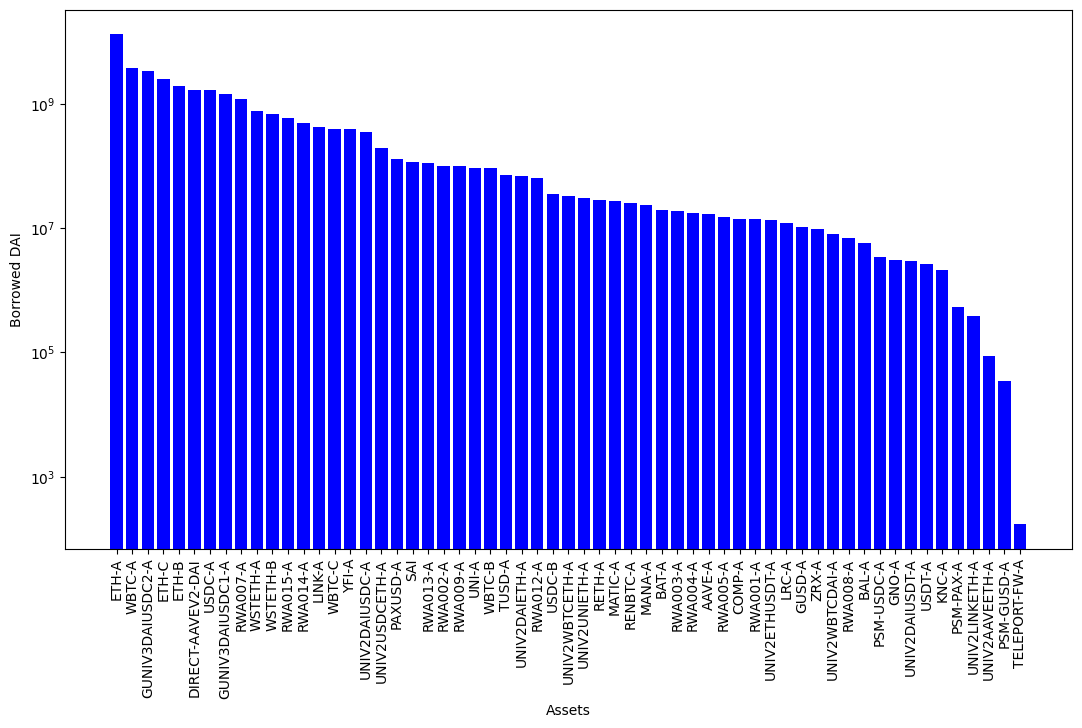

In [9]:
fig = plt.figure(figsize=(13, 7)) 
plt.bar(list(dict(overall_debt_ilk_sorted).keys())[:-5], list(dict(overall_debt_ilk_sorted).values())[:-5], color='blue')

plt.ylabel('Borrowed DAI')
plt.yscale('log')
plt.xlabel('Assets')
plt.xticks(rotation = 90)

# plt.show()
plt.savefig('debts_per_ilk.png')

In [1]:
dates = {'Oct, 2019': '2019-10-01 00:00:00 UTC', 'Nov, 2019': '2019-12-01 00:00:00 UTC', 'Dec, 2019': '2020-01-01 00:00:00 UTC',
         
         'Jan, 2020': '2020-02-01 00:00:00 UTC', 'Feb, 2020': '2020-03-01 00:00:00 UTC', 'March, 2020': '2020-04-01 00:00:00 UTC', 'Apr, 2020': '2020-05-01 00:00:00 UTC',
         'May, 2020': '2020-06-01 00:00:00 UTC', 'Jun, 2020': '2020-07-01 00:00:00 UTC', 'Jul, 2020': '2020-08-01 00:00:00 UTC', 'Aug, 2020': '2020-09-01 00:00:00 UTC',
         'Sep, 2020': '2020-10-01 00:00:00 UTC', 'Oct, 2020': '2020-11-01 00:00:00 UTC', 'Nov, 2020': '2020-12-01 00:00:00 UTC', 'Dec, 2020': '2021-01-01 00:00:00 UTC',

         'Jan, 2021': '2021-02-01 00:00:00 UTC', 'Feb, 2021': '2021-03-01 00:00:00 UTC', 'March, 2021': '2021-04-01 00:00:00 UTC', 'Apr, 2021': '2021-05-01 00:00:00 UTC',
         'May, 2021': '2021-06-01 00:00:00 UTC', 'Jun, 2021': '2021-07-01 00:00:00 UTC', 'Jul, 2021': '2021-08-01 00:00:00 UTC', 'Aug, 2021': '2021-09-01 00:00:00 UTC',
         'Sep, 2021': '2021-10-01 00:00:00 UTC', 'Oct, 2021': '2021-11-01 00:00:00 UTC', 'Nov, 2021': '2021-12-01 00:00:00 UTC', 'Dec, 2021': '2022-01-01 00:00:00 UTC',
         
         'Jan, 2022': '2022-02-01 00:00:00 UTC', 'Feb, 2022': '2022-03-01 00:00:00 UTC', 'March, 2022': '2022-04-01 00:00:00 UTC', 'Apr, 2022': '2022-05-01 00:00:00 UTC',
         'May, 2022': '2022-06-01 00:00:00 UTC', 'Jun, 2022': '2022-07-01 00:00:00 UTC', 'Jul, 2022': '2022-08-01 00:00:00 UTC', 'Aug, 2022': '2022-09-01 00:00:00 UTC',
         'Sep, 2022': '2022-10-01 00:00:00 UTC', 'Oct, 2022': '2022-11-01 00:00:00 UTC', 'Nov, 2022': '2022-12-01 00:00:00 UTC', 'Dec, 2022': '2023-01-01 00:00:00 UTC',
         
         'Jan, 2023': '2023-02-01 00:00:00 UTC', 'Feb, 2023': '2023-03-01 00:00:00 UTC', 'March, 2023': '2023-04-01 00:00:00 UTC', 'Apr, 2023': '2023-05-01 00:00:00 UTC',
         'May, 2023': '2023-06-01 00:00:00 UTC', 'Jun, 2023': '2023-07-01 00:00:00 UTC', 'Jul, 2023': '2023-08-01 00:00:00 UTC'}

In [11]:
top_5_ilk = ['ETH-A', 'WBTC-A', 'GUNIV3DAIUSDC2-A', 'ETH-C', 'ETH-B']

In [ ]:
# calculate debt per month for top-5 ilk

debt_time = dict()

for prog in top_5_ilk:

    df_ilk = operations[operations['ilk'] == prog]
    isFirstElement = True

    debt_all_dates = []
    for date in dates:

        if isFirstElement:
            prev_date = date
            isFirstElement = False
            continue

        prev_timestamp = dates[prev_date]
        cur_timestamp = dates[date]
        mask = (pd.to_datetime(df_ilk['timestamp']) >= pd.to_datetime(prev_timestamp)) & (pd.to_datetime(df_ilk['timestamp']) < pd.to_datetime(cur_timestamp))
        df_mask = df_ilk[mask]
        df_gen_dai = df_mask[df_mask['user_action'] == 'generate dai']

        if len(debt_all_dates) == 0:
            debt_all_dates.append(np.sum(df_gen_dai.dai))
        else:
            debt_all_dates.append(np.sum(df_gen_dai.dai) + debt_all_dates[-1])
        
        prev_date = date

    debt_time[prog] = debt_all_dates

In [ ]:
# calculate debt per month for others ilk

df_others = operations[(operations['ilk'] != 'ETH-A') & (operations['ilk'] != 'ETH-B') & (operations['ilk'] != 'ETH-C') & (operations['ilk'] != 'WBTC-A') & (operations['ilk'] != 'GUNIV3DAIUSDC2-A')]

isFirstElement = True

debt_all_dates = []
for date in dates:

    if isFirstElement:
        prev_date = date
        isFirstElement = False
        continue

    prev_timestamp = dates[prev_date]
    cur_timestamp = dates[date]
    mask = (pd.to_datetime(df_others['timestamp']) >= pd.to_datetime(prev_timestamp)) & (pd.to_datetime(df_others['timestamp']) < pd.to_datetime(cur_timestamp))
    df_mask = df_others[mask]
    df_gen_dai = df_mask[df_mask['user_action'] == 'generate dai']

    if len(debt_all_dates) == 0:
        debt_all_dates.append(np.sum(df_gen_dai.dai))
    else:
        debt_all_dates.append(np.sum(df_gen_dai.dai) + debt_all_dates[-1])
    
    prev_date = date

debt_time['others'] = debt_all_dates

In [136]:
debt_time_df = pd.DataFrame([debt_time])

In [137]:
debt_time_df.to_csv('debt_time_df.csv')

In [14]:
debt_time_df = pd.read_csv('debt_time_df.csv')

In [16]:
dict_debt_time_df = dict(debt_time_df)

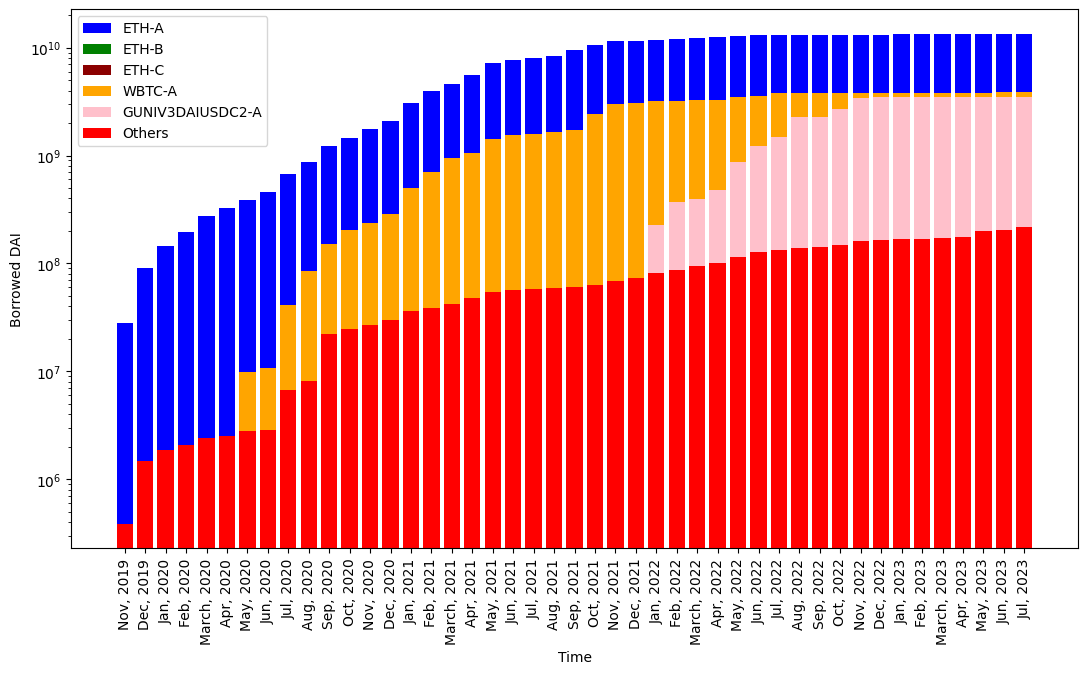

In [156]:
fig = plt.figure(figsize=(13, 7))

plt.bar(list(dates.keys())[1:], debt_time['ETH-A'], color='blue', label='ETH-A')
plt.bar(list(dates.keys())[1:], debt_time['ETH-B'], color='green', label='ETH-B')
plt.bar(list(dates.keys())[1:], debt_time['ETH-C'], color='darkred', label='ETH-C')
plt.bar(list(dates.keys())[1:], debt_time['WBTC-A'], color='orange', label='WBTC-A')
plt.bar(list(dates.keys())[1:], debt_time['GUNIV3DAIUSDC2-A'], color='pink', label='GUNIV3DAIUSDC2-A')
plt.bar(list(dates.keys())[1:], debt_time['others'], color='red', label='Others')

plt.legend()
# plt.grid()

plt.ylabel('Borrowed DAI')
plt.yscale('log')
plt.xlabel('Time')
plt.xticks(rotation = 90)

plt.show()

In [2]:
dates_without_comma = []
for i in list(dates.keys())[1:]:
    date = str(str(i.split(',')[0]) + ' ' + str(i.split(',')[1]))
    dates_without_comma.append(date)

In [10]:
d = {'x':dates_without_comma, 'd_e_a': dict_debt_time_df['ETH-A'], 'd_e_b': dict_debt_time_df['ETH-B'], 'd_e_c': dict_debt_time_df['ETH-C'], 'd_w': dict_debt_time_df['WBTC-A'], 'd_g': dict_debt_time_df['GUNIV3DAIUSDC2-A'], 'd_o': dict_debt_time_df['others']}
d_df = pd.DataFrame(d)
d_df.to_csv('top5_ilk_per_time.csv')

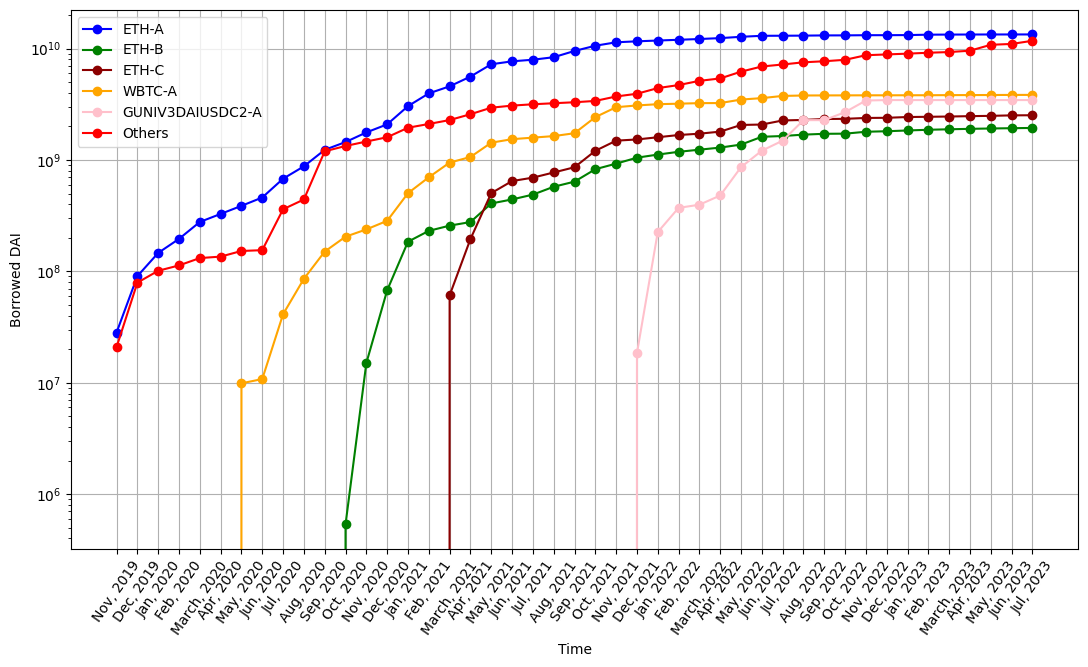

In [35]:
fig = plt.figure(figsize=(13, 7))

plt.plot(list(dates.keys())[1:], dict_debt_time_df['ETH-A'], color='blue', label='ETH-A', marker='o')
plt.plot(list(dates.keys())[1:], dict_debt_time_df['ETH-B'], color='green', label='ETH-B', marker='o')
plt.plot(list(dates.keys())[1:], dict_debt_time_df['ETH-C'], color='darkred', label='ETH-C', marker='o')
plt.plot(list(dates.keys())[1:], dict_debt_time_df['WBTC-A'], color='orange', label='WBTC-A', marker='o')
plt.plot(list(dates.keys())[1:], dict_debt_time_df['GUNIV3DAIUSDC2-A'], color='pink', label='GUNIV3DAIUSDC2-A', marker='o')
plt.plot(list(dates.keys())[1:], dict_debt_time_df['others'], color='red', label='Others', marker='o')

plt.legend()
plt.grid()

plt.ylabel('Borrowed DAI')
plt.yscale('log')
plt.xlabel('Time')
plt.xticks(rotation = 55)

plt.show()
plt.savefig('debt_ilk_time.png')

Map Rate DAI/USD from fold \
Get fold rate from decoding file from first step

In [87]:
fold = vau[vau['fn_name']=='fold']
fold

,Unnamed: 0,timestamp,transaction_hash,fn_name,ilk,usr,src,state,dart,dink,rad
0,0,2019-11-13 20:06:02 UTC,0xc121074d8764d1ab54187b120db3a218651da54ca0d1...,fold,ETH-A,NaN,NaN,{'rate': 0},NaN,NaN,NaN
1,1,2019-11-13 20:06:37 UTC,0x579fc9066f8dfbcc7979184349aea7f69fb6ed51c04e...,fold,BAT-A,NaN,NaN,{'rate': 0},NaN,NaN,NaN
2,2,2019-11-13 20:07:20 UTC,0x0b7a1d4914e4c002216ac977112b45590996a53b4718...,fold,SAI,NaN,NaN,{'rate': 0},NaN,NaN,NaN
3,3,2019-11-13 21:22:33 UTC,0x6fdf3780edf0f25cd63658089ee8b99ede6de002d45a...,fold,ETH-A,NaN,NaN,{'rate': 5709754190193566796042},NaN,NaN,NaN
7,7,2019-11-13 21:45:03 UTC,0xacb58d76bf55b3fb1bb46baf6bd784c95cd22fd3d39d...,fold,ETH-A,NaN,NaN,{'rate': 1678979880963078030542},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2635892,2635892,2023-07-31 15:37:35 UTC,0xb459281cad6642edb5252a756fb3d152065683a398b4...,fold,WSTETH-A,NaN,NaN,{'rate': 937790436289454946088},NaN,NaN,NaN
2635906,2635906,2023-07-31 16:02:35 UTC,0xd1f474aeeb36f133ad0a56ca4da9b6416da29254bbee...,fold,WSTETH-B,NaN,NaN,{'rate': 10446112949544581730183},NaN,NaN,NaN
2635944,2635944,2023-07-31 17:31:35 UTC,0x33341e5603c27ec28a4e6bb7c648bf241f9910e76fd3...,fold,ETH-C,NaN,NaN,{'rate': 14411214258490967703146},NaN,NaN,NaN
2635955,2635955,2023-07-31 17:49:47 UTC,0x916067f21acdfcb9e1a4f6ff22252e5d71c62eb4be03...,fold,WSTETH-B,NaN,NaN,{'rate': 6458089358559648090813},NaN,NaN,NaN


In [63]:
fold.ilk.value_counts().to_csv('collateralized_risk_programs.csv')

In [89]:
fold_rate = 10 ** 27

def get_dai_rate(row):
    global fold_rate
    state = row['state']
    rate = int(state.split(': ')[1].split('}')[0])
    fold_rate += rate
    row['rate'] = fold_rate
    return row

fold_ethA = fold_rate_ethA.progress_apply(get_dai_rate, axis=1)
fold_ethA

  0%|          | 0/157798 [00:00<?, ?it/s]

100%|██████████| 157798/157798 [01:52<00:00, 1402.16it/s]


,Unnamed: 0,timestamp,transaction_hash,fn_name,ilk,usr,src,state,dart,dink,rad,rate
0,0,2019-11-13 20:06:02 UTC,0xc121074d8764d1ab54187b120db3a218651da54ca0d1...,fold,ETH-A,NaN,NaN,{'rate': 0},NaN,NaN,NaN,1000000000000000000000000000
1,3,2019-11-13 21:22:33 UTC,0x6fdf3780edf0f25cd63658089ee8b99ede6de002d45a...,fold,ETH-A,NaN,NaN,{'rate': 5709754190193566796042},NaN,NaN,NaN,1000005709754190193566796042
2,7,2019-11-13 21:45:03 UTC,0xacb58d76bf55b3fb1bb46baf6bd784c95cd22fd3d39d...,fold,ETH-A,NaN,NaN,{'rate': 1678979880963078030542},NaN,NaN,NaN,1000007388734071156644826584
3,11,2019-11-13 22:07:52 UTC,0x03fa1df874381210015181649dbf10f868905b2ad7e9...,fold,ETH-A,NaN,NaN,{'rate': 1702612846924510909427},NaN,NaN,NaN,1000009091346918081155736011
4,15,2019-11-13 22:09:02 UTC,0x240f70803d5c88d90c50eba8329e17041a950e3ecb3f...,fold,ETH-A,NaN,NaN,{'rate': 87058441148993523259},NaN,NaN,NaN,1000009178405359230149259270
...,...,...,...,...,...,...,...,...,...,...,...,...
157793,2635280,2023-07-30 19:04:35 UTC,0x8c624f97c01b6ce8c67d2f4802d943364d581774e716...,fold,ETH-A,NaN,NaN,{'rate': 28189967221986120223},NaN,NaN,NaN,1095207613963176013607541877
157794,2635408,2023-07-30 21:35:23 UTC,0xaf8375521ed096fcb8fce7da6750dbd8c77e35ce0685...,fold,ETH-A,NaN,NaN,{'rate': 10627669343487664056952},NaN,NaN,NaN,1095218241632519501271598829
157795,2635515,2023-07-31 00:21:11 UTC,0x93b8dcd467eef648f8b2350f1af4af37870cff54cf8b...,fold,ETH-A,NaN,NaN,{'rate': 11684917283148761250063},NaN,NaN,NaN,1095229926549802650032848892
157796,2635882,2023-07-31 15:18:47 UTC,0x6e072f7218a50777b4f5250919d972530eece6d41019...,fold,ETH-A,NaN,NaN,{'rate': 63261402962433981584451},NaN,NaN,NaN,1095293187952765084014433343


In [93]:
fold_ethA['rate'] = fold_ethA['rate'].apply(lambda x: x/1e27)

Map DAI/USD rate from 2 tables

In [90]:
#Filter ETH-A from table operations
cond = operations['ilk'] == 'ETH-A'
ETH_A = operations[cond]
ETH_A = ETH_A.reset_index(drop=True)
ETH_A

,Unnamed: 0,usr,ilk,transaction_hash,timestamp,user_action,lock_collateral,dai,dai(in exchange)
0,0,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0a90315a4e3da0ca3e55bc9f551fbaf7ce900cb5437c...,2021-10-29 09:12:00 UTC,lock asset,90.500000,0.000000,0.000000
1,1,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0a90315a4e3da0ca3e55bc9f551fbaf7ce900cb5437c...,2021-10-29 09:12:00 UTC,generate dai,0.000000,150000.000000,141962.260382
2,2,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0xae5ebf075eca8a90246f271932bf391b8ed027b1628c...,2021-10-29 09:29:08 UTC,lock asset,34.400000,0.000000,0.000000
3,3,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0xae5ebf075eca8a90246f271932bf391b8ed027b1628c...,2021-10-29 09:29:08 UTC,generate dai,0.000000,75000.000000,70981.084371
4,4,0x0000485d124CA18832ebC0E0e3D1947EE4dB8427,ETH-A,0x0c5a276fa23ca9c4b708b5630fd7d23bcb0b9c1511aa...,2021-11-21 15:46:07 UTC,payback dai,0.000000,-225317.178235,-212943.344753
...,...,...,...,...,...,...,...,...,...
456236,878021,0xffcA6A7Bb1e97E163209EaAA4Bba941b5D375b79,ETH-A,0x7e1486df5747093e22022ca8b17243b026c21b78649d...,2021-03-01 14:11:21 UTC,unlock asset,-100.000000,0.000000,0.000000
456237,878022,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6dc580b5554d9dd18dbad5f73c620b99cd6e41990288...,2019-11-19 23:30:47 UTC,lock asset,3.139039,0.000000,0.000000
456238,878023,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6dc580b5554d9dd18dbad5f73c620b99cd6e41990288...,2019-11-19 23:30:47 UTC,generate dai,0.000000,165.470733,165.361658
456239,878024,0xfff3d21322AA95091aAdD6064B5D591cDc2B990D,ETH-A,0x6ec359778aae7fe64ee8220b6baf8b92bb557f6ec2aa...,2020-03-25 10:36:48 UTC,payback dai,0.000000,-168.607641,-165.361658


In [165]:
fee = pd.read_csv('fee_vaults.csv')

Map ETH price

In [51]:
# To map eth price with data table, need to get eth rate from Big query by this code

'''
SELECT block_timestamp, output
FROM  `bigquery-public-data.crypto_ethereum.traces`
WHERE DATE(block_timestamp) >= "2019-11-12"
        and from_address = Lower("0x65c79fcb50ca1594b025960e539ed7a9a6d434a3")
        and to_address = LOWER("0x81fe72b5a8d1a857d176c3e7d5bd2679a9b85763")
        and block_timestamp < '2023-08-01'
'''

'\nSELECT block_timestamp, output\nFROM  `bigquery-public-data.crypto_ethereum.traces`\nWHERE DATE(block_timestamp) >= "2019-11-12"\n        and from_address = Lower("0x65c79fcb50ca1594b025960e539ed7a9a6d434a3")\n        and to_address = LOWER("0x81fe72b5a8d1a857d176c3e7d5bd2679a9b85763")\n        and block_timestamp < \'2023-08-01\'\n'

In [170]:
# file rate ETH/DAI from big query
rate_eth = pd.read_csv('ETH_as_of_Jul2023.csv')
rate_eth.output[0]

'0x000000000000000000000000000000000000000000000012665c062b683ac0000000000000000000000000000000000000000000000000000000000000000001'

In [30]:
rate_eth.rename(columns = {'block_timestamp':'timestamp'}, inplace = True)
rate_eth['timestamp'] = pd.to_datetime(rate_eth['timestamp'])
rate_eth = rate_eth.sort_values(by='timestamp', ascending=True)
rate_eth = rate_eth.reset_index(drop=True)
rate_eth['rate'] = rate_eth['output'].apply(lambda x: int(x[:66], 0)/1e18 if isinstance(x, str) and len(x) >= 66 else None)
rate_eth

,timestamp,output,rate
0,2019-11-13 20:11:19+00:00,0x00000000000000000000000000000000000000000000...,0.000000
1,2019-11-15 06:06:45+00:00,0x00000000000000000000000000000000000000000000...,181.439693
2,2019-11-15 07:05:47+00:00,0x00000000000000000000000000000000000000000000...,181.439693
3,2019-11-15 12:16:54+00:00,0x00000000000000000000000000000000000000000000...,181.439693
4,2019-11-15 13:43:45+00:00,0x00000000000000000000000000000000000000000000...,183.300000
...,...,...,...
91396,2023-07-31 23:00:23+00:00,0x00000000000000000000000000000000000000000000...,1854.800000
91397,2023-07-31 23:00:23+00:00,0x00000000000000000000000000000000000000000000...,1854.800000
91398,2023-07-31 23:00:23+00:00,0x00000000000000000000000000000000000000000000...,1854.800000
91399,2023-07-31 23:00:23+00:00,0x00000000000000000000000000000000000000000000...,1854.800000


In [31]:
rate = rate_eth.drop(columns=['output'])
rate.to_csv('USD_ETH.csv')

In [176]:
rate_wbtc = pd.read_csv('WBTC_as_of_Dec2019.csv')
rate_wbtc.sort_values('block_timestamp')

,block_timestamp,output
86528,2019-11-13 19:17:57 UTC,0x
81009,2019-11-13 19:17:57 UTC,0x
39453,2019-11-13 19:17:57 UTC,0x608060405234801561001057600080fd5b5060043610...
71347,2019-11-13 19:17:57 UTC,0x
180990,2019-11-13 19:33:39 UTC,0x00000000000000000000000000000000000000000000...
...,...,...
115675,2019-12-12 23:57:49 UTC,0x00000000000000000000000000000000000000000000...
21682,2019-12-12 23:57:49 UTC,0x00000000000000000000000000000000000000000000...
214973,2019-12-12 23:57:49 UTC,0x00000000000000000000000000000000000000000000...
130817,2019-12-12 23:58:37 UTC,0x00000000000000000000000000000000000000000000...


In [180]:
rate_wbtc.rename(columns = {'block_timestamp':'timestamp'}, inplace = True)
rate_wbtc['timestamp'] = pd.to_datetime(rate_wbtc['timestamp'])
rate_wbtc = rate_wbtc.sort_values(by='timestamp', ascending=True)
rate_wbtc = rate_wbtc.reset_index(drop=True)
rate_wbtc['rate'] = rate_wbtc['output'].apply(lambda x: int(x[:66], 0)/1e18 if isinstance(x, str) and len(x) >= 66 else None)
# rate_wbtc['rate'] = rate_wbtc['output'].apply(lambda x: int(x)/1e18 if isinstance(x, str) and len(x) >= 66 else None)
rate_wbtc

,timestamp,output,rate
0,2019-11-13 19:17:57+00:00,0x,NaN
1,2019-11-13 19:17:57+00:00,0x,NaN
2,2019-11-13 19:17:57+00:00,0x608060405234801561001057600080fd5b5060043610...,4.364885e+58
3,2019-11-13 19:17:57+00:00,0x,NaN
4,2019-11-13 19:33:39+00:00,0x00000000000000000000000000000000000000000000...,1.000000e-18
...,...,...,...
270303,2019-12-12 23:57:49+00:00,0x00000000000000000000000000000000000000000000...,1.022557e+06
270304,2019-12-12 23:57:49+00:00,0x00000000000000000000000000000000000000000000...,1.000000e-18
270305,2019-12-12 23:57:49+00:00,0x00000000000000000000000000000000000000000000...,1.000000e-18
270306,2019-12-12 23:58:37+00:00,0x00000000000000000000000000000000000000000000...,1.000000e-18


In [38]:
liq_rate = pd.read_csv('liquidate_rate_jul2023.csv')
liq_rate

,block_timestamp,input
0,2021-12-09 14:00:24 UTC,0x1a0b287e47554e49563344414955534443322d410000...
1,2021-10-31 14:58:29 UTC,0x1a0b287e5a52582d4100000000000000000000000000...
2,2021-10-31 14:57:53 UTC,0x1a0b287e4241542d4100000000000000000000000000...
3,2021-10-31 12:00:43 UTC,0xd9638d364554482d4300000000000000000000000000...
4,2021-10-31 12:00:34 UTC,0x495d32cb
...,...,...
562803,2021-10-15 07:01:10 UTC,0x1504460f5a52582d4100000000000000000000000000...
562804,2021-10-15 17:01:09 UTC,0x1504460f5a52582d4100000000000000000000000000...
562805,2021-10-13 07:01:03 UTC,0x1504460f5a52582d4100000000000000000000000000...
562806,2021-10-13 08:00:25 UTC,0x1504460f5a52582d4100000000000000000000000000...


In [27]:
abi_vat = open("SPOT.txt", 'r').read()
w3 = Web3()
contract = w3.eth.contract(abi=abi_vat)

In [28]:
def decode_spot(tx_input):

    index = ['fn_name', 'args', 'timestamp']
    result = contract.decode_function_input(tx_input['input'])

    fn_name = result[0].fn_name
    fn_args = result[1]

    block_timestamp = tx_input['block_timestamp']

    return pd.Series(data=(fn_name, fn_args, block_timestamp), index=index)

In [41]:
tqdm.pandas()
res_liq_rate = liq_rate.progress_apply(decode_spot, axis=1)

100%|██████████| 562808/562808 [11:19<00:00, 828.68it/s] 


In [42]:
res_liq_rate

,fn_name,args,timestamp
0,file,{'ilk': b'GUNIV3DAIUSDC2-A\x00\x00\x00\x00\x00...,2021-12-09 14:00:24 UTC
1,file,{'ilk': b'ZRX-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-31 14:58:29 UTC
2,file,{'ilk': b'BAT-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-31 14:57:53 UTC
3,ilks,{'': b'ETH-C\x00\x00\x00\x00\x00\x00\x00\x00\x...,2021-10-31 12:00:43 UTC
4,par,{},2021-10-31 12:00:34 UTC
...,...,...,...
562803,poke,{'ilk': b'ZRX-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-15 07:01:10 UTC
562804,poke,{'ilk': b'ZRX-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-15 17:01:09 UTC
562805,poke,{'ilk': b'ZRX-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-13 07:01:03 UTC
562806,poke,{'ilk': b'ZRX-A\x00\x00\x00\x00\x00\x00\x00\x0...,2021-10-13 08:00:25 UTC


In [43]:
res_liq_rate.to_csv('res_liq_rate.csv')

In [12]:
res_liq_rate = pd.read_csv('res_liq_rate.csv')

In [13]:
res_liq_rate['fn_name'].unique()

array(['file', 'ilks', 'par', 'poke', 'deny', 'rely'], dtype=object)

In [14]:
file_result = res_liq_rate[res_liq_rate['fn_name']=='file']
file_result = file_result.reset_index(drop=True)

In [51]:
file_result.args[0]

"{'ilk': b'GUNIV3DAIUSDC2-A\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00', 'what': b'mat\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00', 'data': 1050000000000000000000000000}"

In [96]:
import ast

In [15]:
def get_arg_spot(df):
  cols = ['timestamp', 'ilk', 'what', 'rate']
  time = df['timestamp']
  dic = df['args']

  ilk = str(ast.literal_eval(dic).get('ilk', None))
  ilk = ilk.replace("b'", "'")
  ilk = ilk.replace("\\x00", "")
  ilk = ilk.replace("\'", "\"")

  what = str(ast.literal_eval(dic).get('what', None))
  what = what.replace("b'", "'")
  what = what.replace("\\x00", "")
  what = what.replace("\'", "\"")

  rate = ast.literal_eval(dic).get('data', None)

  return pd.Series(data=(time, ilk, what, rate), index=cols)

In [16]:
tab_liq = file_result.progress_apply(get_arg_spot, axis=1)

  0%|          | 0/697 [00:00<?, ?it/s]

100%|██████████| 697/697 [00:00<00:00, 1498.77it/s]


In [17]:
tab_liq

,timestamp,ilk,what,rate
0,2021-12-09 14:00:24 UTC,"""GUNIV3DAIUSDC2-A""","""mat""",1050000000000000000000000000
1,2021-10-31 14:58:29 UTC,"""ZRX-A""","""mat""",4171541956018518518250000000
2,2021-10-31 14:57:53 UTC,"""BAT-A""","""mat""",3670992476851851848000000000
3,2021-12-06 14:46:17 UTC,"""BAL-A""","""mat""",11634617438271604933000000000
4,2021-12-06 14:46:17 UTC,"""BAT-A""","""mat""",55599069797790090088949347385
...,...,...,...,...
692,2021-10-13 08:56:45 UTC,"""BAT-A""","""mat""",1693823881172839502000000000
693,2021-10-14 21:07:59 UTC,"""LRC-A""","""mat""",3082515046296296294500000000
694,2021-10-15 14:19:40 UTC,"""KNC-A""","""mat""",20871147376543209834250000000
695,2023-02-27 14:18:35 UTC,"""DIRECT-AAVEV2-DAI""","""pip""",None


## Liquidation ratio for each collateral token

In [18]:
tab_liq_sort = tab_liq.sort_values(by='timestamp')
programs = list(tab_liq_sort['ilk'].unique())
cond1 = tab_liq_sort['what'] == '"mat"'
rate_old = []
rate_new = []
for prog in programs:
    cond2 = tab_liq_sort['ilk'] == prog
    tab_cond = tab_liq_sort[ cond1 & cond2 ]
    tab_cond = tab_cond.reset_index(drop=True)
    tab_cond['rate'] = tab_cond['rate'].apply(lambda x: x/1e27)
    rate_old.append(tab_cond.iloc[0].rate)
    rate_new.append(tab_cond.iloc[-1].rate)

In [40]:
tab_liq_sort = tab_liq.sort_values(by='timestamp')
cond1 = tab_liq_sort['what'] == '"mat"'
cond2 = (tab_liq_sort['ilk'] == '"ETH-A"') | (tab_liq_sort['ilk'] == '"USDC-A"') | (tab_liq_sort['ilk'] == '"GUNIV3DAIUSDC2-A"') | (tab_liq_sort['ilk'] == '"WBTC-A"') | (tab_liq_sort['ilk'] == '"ETH-C"') | (tab_liq_sort['ilk'] == 'GUNIV3DAIUSDC1-A') | (tab_liq_sort['ilk'] == '"ETH-B"')
tab_liq_sort_cond = tab_liq_sort[cond1 & cond2]
tab_liq_sort_cond['rate'] = tab_liq_sort_cond['rate'].apply(lambda x: x/1e27)

In [93]:
rate_eth_a = []
rate_usdc_a = []
rate_wbtc_a = []
rate_eth_c = []
rate_gun_c = []
rate_eth_b = []

In [94]:
dates_eth_a = pd.date_range("2019-11-13", "2023-01-01", freq="M")
rate_eth_a.extend([1.50]*len(pd.date_range("2019-11-13", "2021-08-27", freq="M")))
rate_eth_a.extend([1.45]*len(pd.date_range("2021-08-27", "2023-01-01", freq="M")))


rate_usdc_a.extend([1.25]*(len((pd.date_range(pd.to_datetime("2020-03-17"), pd.to_datetime("2020-04-25"), freq="M")))-1))
rate_usdc_a.extend([1.20]*(len((pd.date_range(pd.to_datetime("2020-04-25"), pd.to_datetime("2020-07-27"), freq="M")))-1))
rate_usdc_a.extend([1.10]*(len((pd.date_range(pd.to_datetime("2020-07-27"), pd.to_datetime("2020-09-15"), freq="M")))-1))
rate_usdc_a.extend([1.03]*(len((pd.date_range(pd.to_datetime("2020-09-15"), pd.to_datetime("2020-09-19"), freq="D")))-1))
rate_usdc_a.extend([1.01]*(len((pd.date_range(pd.to_datetime("2020-09-19"), pd.to_datetime("2023-03-13"), freq="M")))-1))
rate_usdc_a.extend([15.00]*len((pd.date_range(pd.to_datetime("2023-03-13"), pd.to_datetime("2023-05-13"), freq="M"))))
dates_usdc_a = pd.date_range("2020-03-17", "2023-05-01", freq="M")

rate_wbtc_a.extend([1.50]*(len((pd.date_range(pd.to_datetime("2020-05-03"), pd.to_datetime("2021-08-27"), freq="M")))))
rate_wbtc_a.extend([1.45]*(len((pd.date_range(pd.to_datetime("2021-08-27"), pd.to_datetime("2023-01-01"), freq="M")))))
start_date = pd.to_datetime("2020-05-03")
end_date = pd.to_datetime("2023-01-01")
dates_wbtc_a = pd.date_range(start_date, end_date, freq="M")

rate_eth_c.extend([1.75]*(len((pd.date_range(pd.to_datetime("2021-03-19"), pd.to_datetime("2021-08-27"), freq="M")))))
rate_eth_c.extend([1.70]*(len((pd.date_range(pd.to_datetime("2021-08-27"), pd.to_datetime("2023-01-01"), freq="M")))))
start_date = pd.to_datetime("2021-03-19")
end_date = pd.to_datetime("2023-01-01")
dates_eth_c = pd.date_range(start_date, end_date, freq="M")

rate_gun_c.extend([1.05]*(len((pd.date_range(pd.to_datetime("2021-12-09"), pd.to_datetime("2022-01-24"), freq="M")))))
rate_gun_c.extend([1.02]*(len((pd.date_range(pd.to_datetime("2022-01-24"), pd.to_datetime("2023-01-01"), freq="M")))))
start_date = pd.to_datetime("2021-12-09")
end_date = pd.to_datetime("2023-01-01")
dates_gun_c = pd.date_range(start_date, end_date, freq="M")

In [ ]:
dates_eth_a.append(pd.date_range(pd.to_datetime("2021-08-27"), pd.to_datetime("2023-01-01"), freq="M"))
dates_usdc_a.append(pd.date_range(pd.to_datetime("2023-03-13"), pd.to_datetime("2023-05-01"), freq="M"))
dates_wbtc_a.append(pd.date_range(pd.to_datetime("2021-08-27"), pd.to_datetime("2023-01-01"), freq="M"))
dates_eth_c.append(pd.date_range(pd.to_datetime("2021-08-27"), pd.to_datetime("2023-01-01"), freq="M"))
dates_gun_c.append(pd.date_range(pd.to_datetime("2022-01-24"), pd.to_datetime("2023-01-01"), freq="M"))

In [71]:
d = {'ilk': programs, 'rate_old': rate_old, 'rate_new': rate_new}
liq_ratio = pd.DataFrame(data=d)
liq_ratio.sort_values(by='rate_old', ascending=False).to_csv('liquidation_ratio.csv')

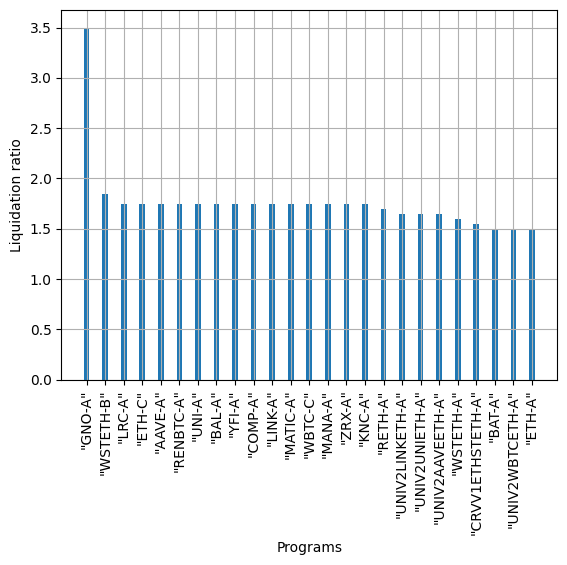

In [70]:
plt.bar(liq_ratio.sort_values(by='rate_old', ascending=False).ilk[:25], liq_ratio.sort_values(by='rate_old', ascending=False).rate_old[:25], width = 0.3)
plt.xticks(rotation=90)
plt.xlabel('Programs')
plt.ylabel('Liquidation ratio')
plt.grid()
plt.show()